In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
# 기존 raw data에서 grade를 추가해줌
# 0.6이상 - 4 / 0.5이상 - 3 / 0.4이상 - 2 / 0.3이상 - 1 / 기타 - 0

In [52]:
bb = pd.read_csv("./Raw_First_Value.csv") 
bb

,team,year,month,pov,obp,slg,ba,era,fb_inning,grade
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,13/25,0
1,4,2015,3,0.000,0.362,0.404,0.298,6.46,14/23.2,0
2,7,2015,3,0.000,0.329,0.313,0.269,5.63,6/16,0
3,8,2015,3,1.000,0.415,0.525,0.303,5.04,17/25,4
4,6,2015,3,0.500,0.311,0.344,0.219,4.76,9/17,3
...,...,...,...,...,...,...,...,...,...,...
529,2,2022,5,0.458,0.339,0.359,0.259,4.12,101/225,2
530,9,2022,5,0.692,0.371,0.447,0.284,4.11,74/232,4
531,1,2022,5,0.423,0.332,0.346,0.248,3.93,70/233.2,2
532,3,2022,5,0.560,0.335,0.398,0.276,3.70,89/226,3


In [53]:
bb.drop(columns="fb_inning", inplace=True)

In [54]:
bb

,team,year,month,pov,obp,slg,ba,era,grade
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,0
1,4,2015,3,0.000,0.362,0.404,0.298,6.46,0
2,7,2015,3,0.000,0.329,0.313,0.269,5.63,0
3,8,2015,3,1.000,0.415,0.525,0.303,5.04,4
4,6,2015,3,0.500,0.311,0.344,0.219,4.76,3
...,...,...,...,...,...,...,...,...,...
529,2,2022,5,0.458,0.339,0.359,0.259,4.12,2
530,9,2022,5,0.692,0.371,0.447,0.284,4.11,4
531,1,2022,5,0.423,0.332,0.346,0.248,3.93,2
532,3,2022,5,0.560,0.335,0.398,0.276,3.70,3


c:\Users\soonae\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


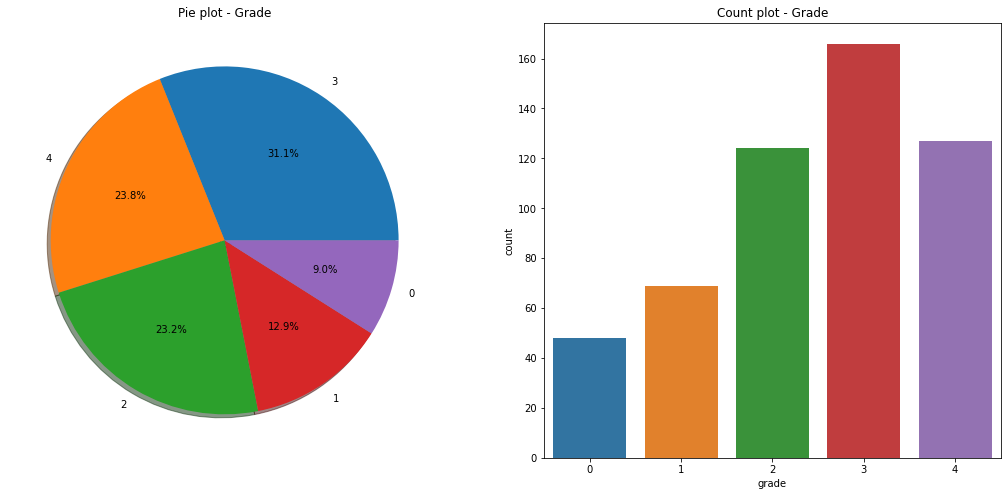

In [55]:
# 등급별로 얼마나 있는지 비율 확인

f, ax = plt.subplots(1, 2, figsize=(18, 8))

bb['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Grade')
ax[0].set_ylabel('')
sns.countplot('grade', data=bb, ax=ax[1])
ax[1].set_title('Count plot - Grade')

plt.show()

In [56]:
corr = bb.corr()
print(corr)

               team          year         month       pov       obp       slg  \
team   1.000000e+00 -2.897184e-15 -6.435775e-17 -0.115621 -0.078452 -0.068407   
year  -2.897184e-15  1.000000e+00 -1.199418e-02 -0.001751 -0.179386 -0.299121   
month -6.435775e-17 -1.199418e-02  1.000000e+00 -0.004201  0.094359  0.069708   
pov   -1.156206e-01 -1.750906e-03 -4.201248e-03  1.000000  0.332913  0.316072   
obp   -7.845232e-02 -1.793857e-01  9.435866e-02  0.332913  1.000000  0.747138   
slg   -6.840687e-02 -2.991214e-01  6.970795e-02  0.316072  0.747138  1.000000   
ba    -1.170678e-01 -2.545450e-01  1.695144e-01  0.233210  0.862917  0.812916   
era    8.328565e-02 -1.628113e-01  7.797397e-02 -0.493769  0.195104  0.294633   
grade -1.378147e-01  3.907200e-04  3.883022e-03  0.899811  0.368969  0.343539   

             ba       era     grade  
team  -0.117068  0.083286 -0.137815  
year  -0.254545 -0.162811  0.000391  
month  0.169514  0.077974  0.003883  
pov    0.233210 -0.493769  0.899811  

In [57]:
# 볼넷 / 이닝은 WHIP로 변환해서 해보는것도..?

In [58]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    534 non-null    int64  
 1   year    534 non-null    int64  
 2   month   534 non-null    int64  
 3   pov     534 non-null    float64
 4   obp     534 non-null    float64
 5   slg     534 non-null    float64
 6   ba      534 non-null    float64
 7   era     534 non-null    float64
 8   grade   534 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 37.7 KB


<AxesSubplot:>

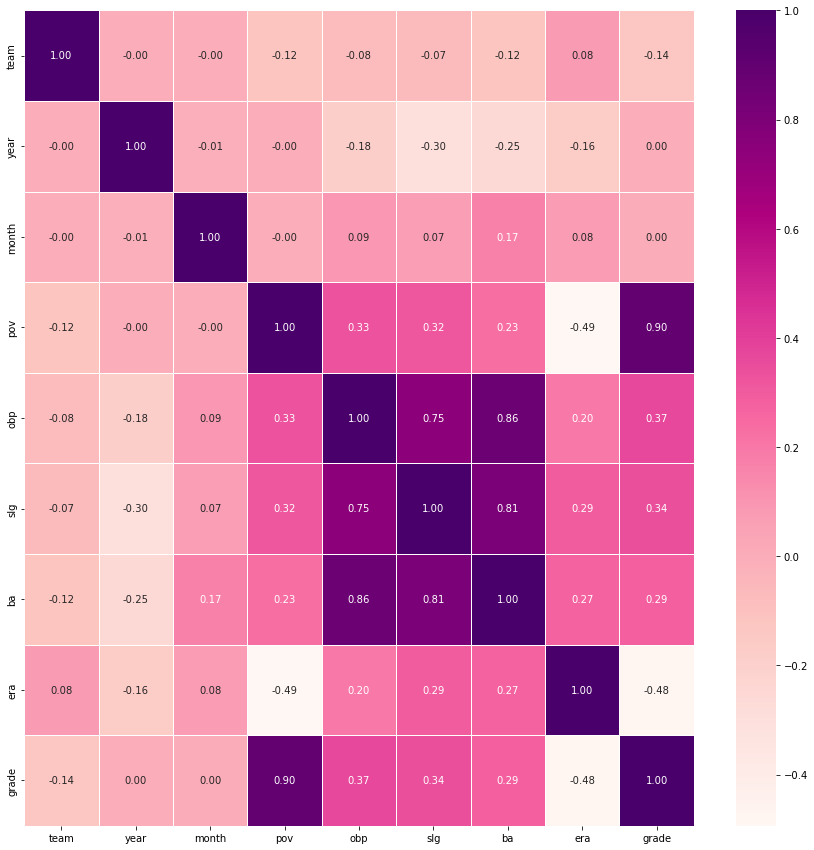

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(data = bb.corr(), annot=True,
fmt = '.2f', linewidths =.5, cmap='RdPu')

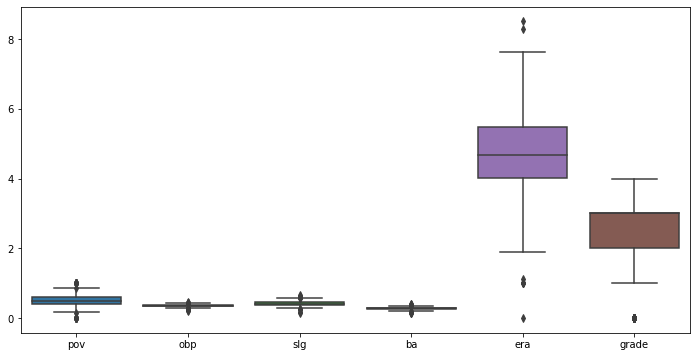

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=bb.iloc[:, 3:]);

In [33]:
X = bb.drop(['grade', 'pov'], axis=1)
y = bb['grade']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

bb = DecisionTreeClassifier(max_depth=2, random_state=13)
bb.fit(X_train, y_train)

y_pred_tr = bb.predict(X_train)
y_pred_test = bb.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.4566744730679157
Test Acc :  0.411214953271028


<Figure size 864x432 with 0 Axes>

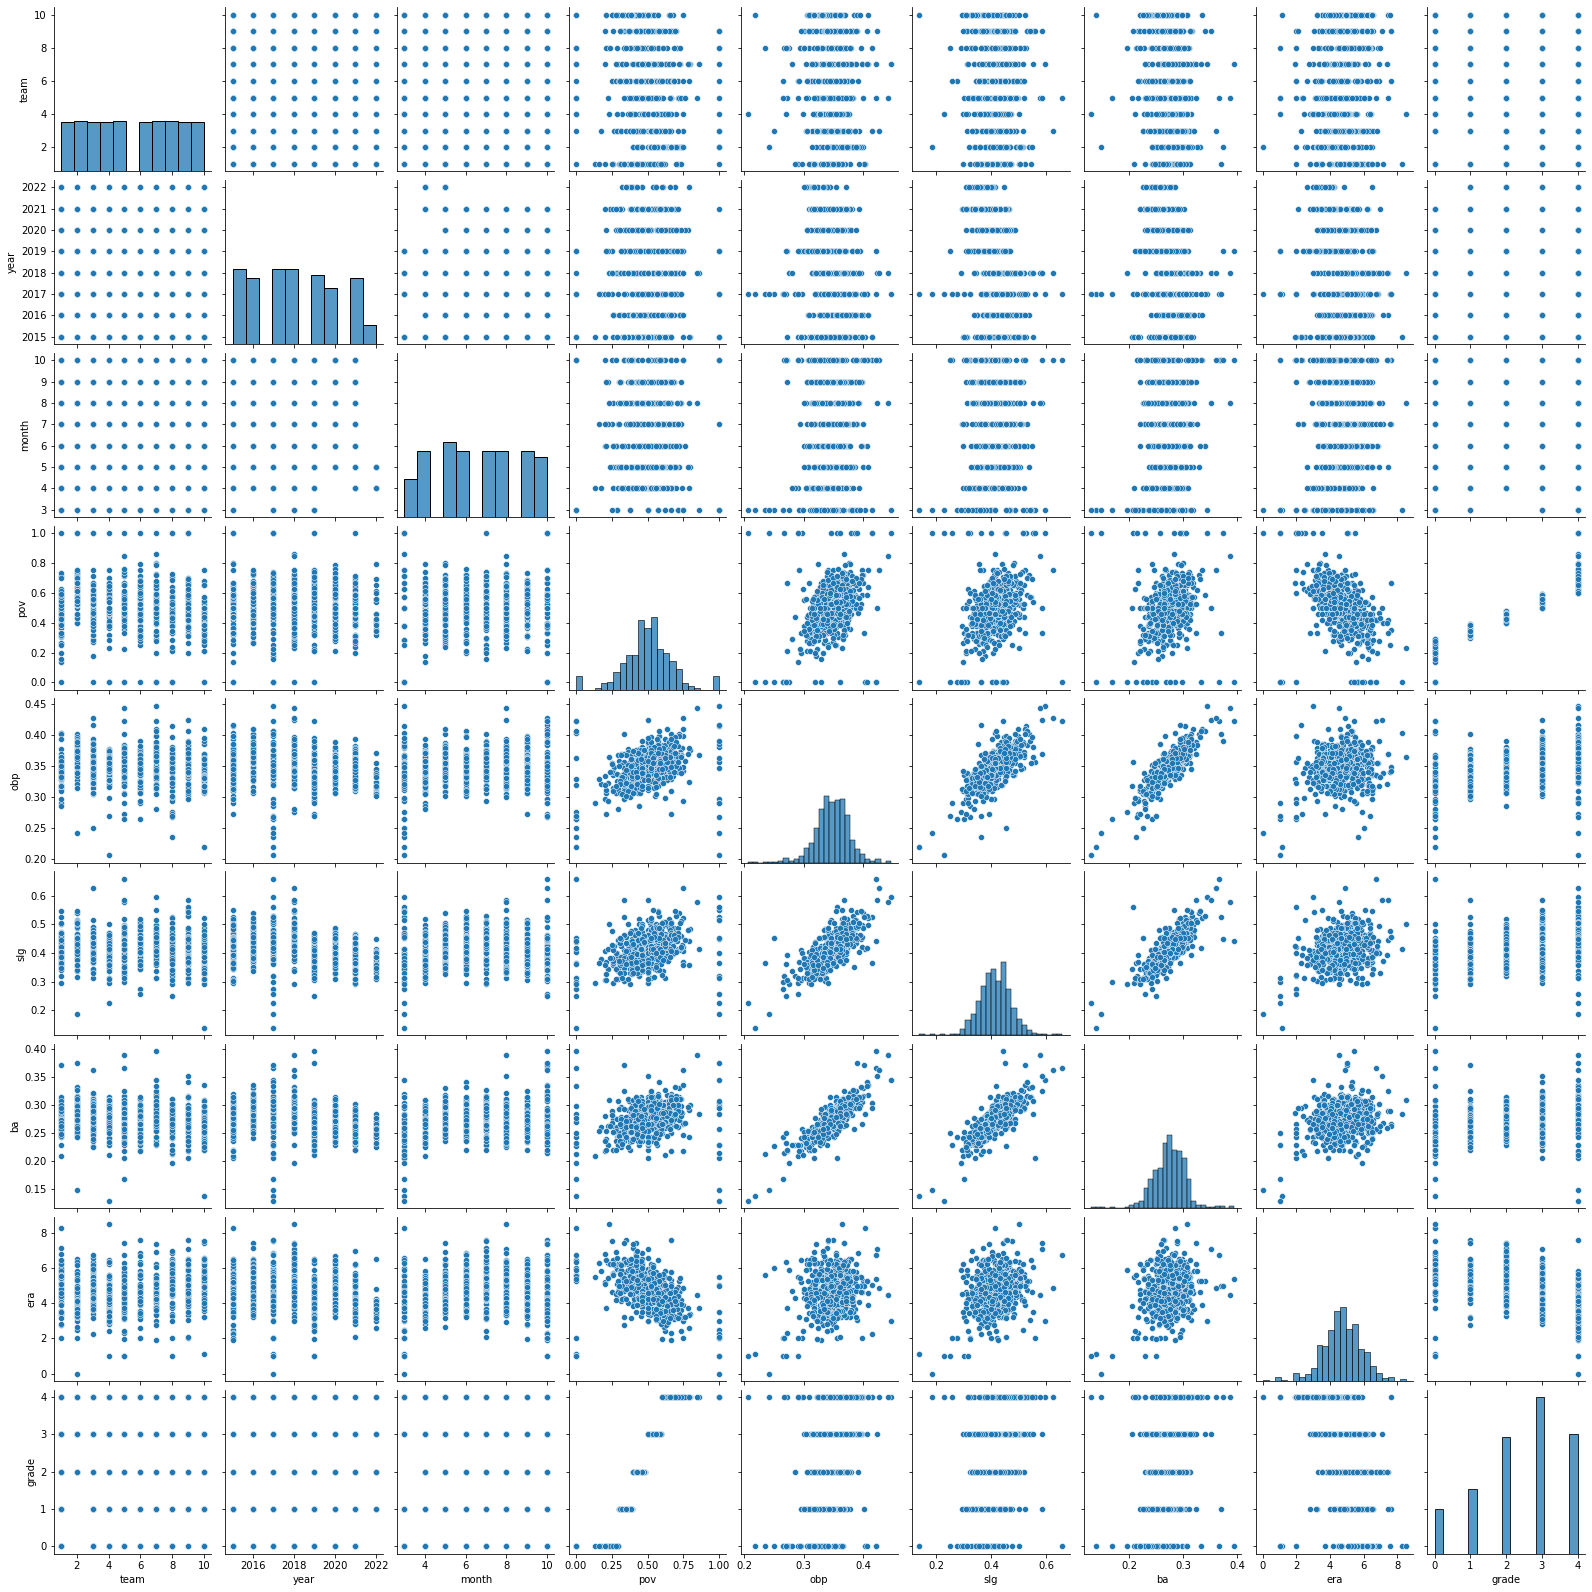

In [67]:
plt.figure(figsize=(12,6))
sns.pairplot(data=bb);

<Figure size 864x432 with 0 Axes>

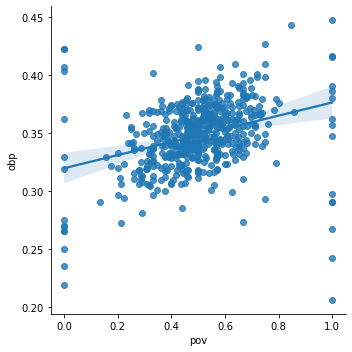

In [73]:
# 회귀선 + 플롯 그래프

lt.figure(figsize=(12,6))
sns.lmplot(x='pov', y='obp', data=bb);

In [74]:
# 승률과 출루율과의 회귀 Report

import statsmodels.api as sm

X = bb['pov']
y = bb['obp']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    obp   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              5082.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                   1.05e-274
Time:                        09:39:02   Log-Likelihood:                          433.03
No. Observations:                 534   AIC:                                     -864.1
Df Residuals:                     533   BIC:                                     -859.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pov            0.6278      0.009     71.291      0.000       0.610       0.645
==============================================================================
Omnibus:                       57.725   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.968
Skew:                          -0.305   Prob(JB):                     2.17e-62
Kurtosis:                       6.520   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""